## GPU 드라이버 설치 (삼성 노트북 Always9 950XBE)
- NVIDIA MX150 Device Driver Update
- CUDA 10.1 설치
- CUDNN 7.6.3 for CUDA 10.1 다운로드

## Tensorflow-gpu 설치
- conda update conda
- conda update anaconda
- conda update python
- conda update --all
- conda info --envs
- conda create --name tf1.14-gpu
- conda activate tf1.14-gpu
- pip install tensorflow-gpu

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [4]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [5]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

W0830 15:03:06.406251  4016 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 15:03:06.407739  4016 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 15:03:06.409723  4016 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
          optimizer='rmsprop', metrics=['accuracy'])

W0830 15:03:12.639337  4016 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0830 15:03:12.662191  4016 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

W0830 15:03:17.017225  4016 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0830 15:03:17.105548  4016 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.3285 - acc: 0.8983 - val_loss: 0.1205 - val_acc: 0.9606

Epoch 00001: val_loss improved from inf to 0.12054, saving model to ./model/01-0.1205.hdf5
Epoch 2/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.1051 - acc: 0.9687 - val_loss: 0.0894 - val_acc: 0.9738

Epoch 00002: val_loss improved from 0.12054 to 0.08942, saving model to ./model/02-0.0894.hdf5
Epoch 3/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.0674 - acc: 0.9797 - val_loss: 0.0904 - val_acc: 0.9707

Epoch 00003: val_loss did not improve from 0.08942
Epoch 4/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.0492 - acc: 0.9852 - val_loss: 0.0809 - val_acc: 0.9779

Epoch 00004: val_loss improved from 0.08942 to 0.08094, saving model to ./model/04-0.0809.hdf5
Epoch 5/30
60000/60000 [==============================] - 2s 31us/

In [10]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 36us/step

 Test Accuracy: 0.9798


In [11]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

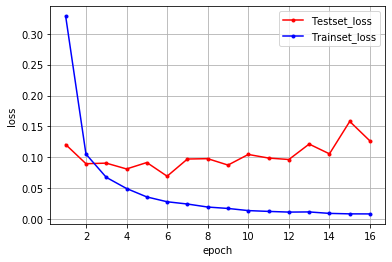

In [12]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 결론: Best Model은 Epoch 6, 정확도는97.98%